# 5.2 선형 판별 분석(Linear Discriminant Analysis, LDA)을 통한 지도방식의 데이터 압축

## 5.2.1 주성분 분석 vs 선형 판별 분석

- 차원의 저주로 인한 과대 적합 정도를 줄이기 위한 특성 추출(feature extraction)의 기법 중 하나
- PCA는 분산이 최대인 직교 성분 축을 찾아 해당 축으로 데이터를 사영한다면, LDA는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾음 
- PCA는 비지도학습, LDA는 비지도학습
- PCA 데이터의 차원을 줄이기 위해, 주어진 데이터가 최대한 안겹치게 내려질 수 있는 화살표를 찾는다. (각 특성별 공분산 행렬을 활용해 데이터의 변동성이 가장 큰 축을 찾는다)
- 반면, LDA는 입력 데이터의 클래스(정답) 를 최대한 분리할 수 있는 축을 찾는다. 


In [ ]:
Image(url='https://git.io/Jtsv8', width=400) 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb6D9dY%2FbtqGexdSCOG%2FtKCMbk1LYIwtgoqCSXN2E1%2Fimg.png" width=500>

## 5.2.2 선형 판별 분석의 내부 동작 방식

1. 표준화 전처리
2. 클래스별 평균 벡터
3. 클래스 간 산포 행렬 $\boldsymbol S_B$, 클래스 내 산포 행렬  $\boldsymbol S_W$을 구하여, 이 산포 행렬을 기반으로 고윳값과 고유 백터를 구함.
<img src="https://blog.kakaocdn.net/dn/bUddPu/btqGkRn2LBy/IvjdGW6noeMyycEeIgkPOK/img.png" width=200>
<img src="https://blog.kakaocdn.net/dn/cYq7ld/btqGexdTpsj/kM4gAmo8EuePnib9g0q7Rk/img.png" width=300>
4. 고윳값을 내림차순 정렬
6. 고윳값이 가장 큰 k개의 고유 벡터 선택
7. 고유 벡터로 만든 변환 행렬로 데이터셋 투영

<img src="https://blog.kakaocdn.net/dn/drcnzd/btqGjfwm8SR/fATBBQi2fe8gB7eSpTGLT1/img.png" width=300>

<br>

## 5.2.6 사이킷런의 LDA

In [7]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
iris = load_iris()

# 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)  # 독립변수만 스케일링

iris_df = pd.DataFrame(iris_scaled)
# iris_df

# 클래스를 가장 잘 나눌 수 있는 n개의 축으로 차원 축소(지도학습)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

# print(lda.predict([[-0.8, ]]))

In [8]:
iris_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [ ]:
# LDA를 적용하여 클래스를 가장 잘 나눌 수 있는 고윳값과 고유벡터를 참고해 원래 4차원으로 구성되어있던 값을 2차원으로 축소 


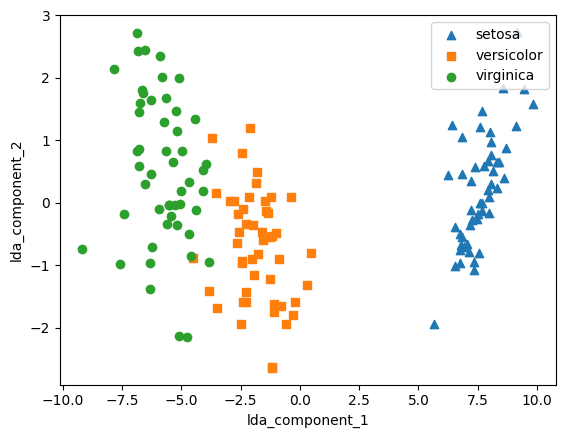

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx], 
                    label=cl)

In [11]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# 데이터 전처리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# LDA로 차원 축소
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

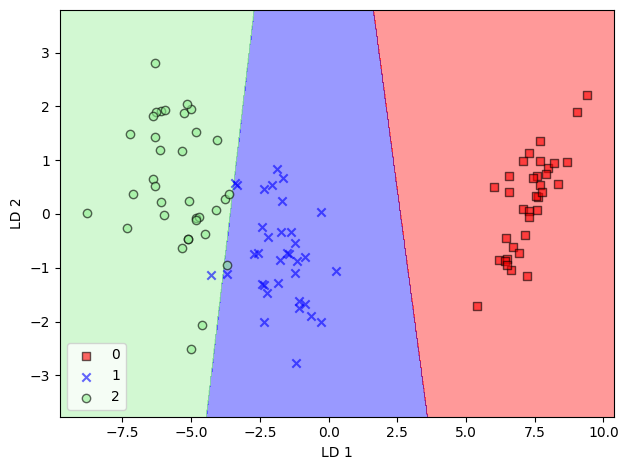

In [12]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

# 결정경계 확인
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

<br>